Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [2]:
import pandas as pd

# Read Excel file
df = pd.read_csv(r"C:\Users\LENOVO THINKPAD 13\Downloads\Basic stats - 1\Basic stats - 1\sales_data_with_discounts.csv")


In [12]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [15]:
columns_to_analyze = ['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value']


In [16]:
for col in columns_to_analyze:
    print(f"\nStatistics for '{col}':")
    
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Mode: {df[col].mode().values}")
        print(f"Standard Deviation: {df[col].std()}")
    else:
        print(f"Skipping '{col}' (non-numeric column)")



Statistics for 'Date':
Skipping 'Date' (non-numeric column)

Statistics for 'Day':
Skipping 'Day' (non-numeric column)

Statistics for 'SKU':
Skipping 'SKU' (non-numeric column)

Statistics for 'City':
Skipping 'City' (non-numeric column)

Statistics for 'Volume':
Mean: 5.066666666666666
Median: 4.0
Mode: [3]
Standard Deviation: 4.231602391213923

Statistics for 'BU':
Skipping 'BU' (non-numeric column)

Statistics for 'Brand':
Skipping 'Brand' (non-numeric column)

Statistics for 'Model':
Skipping 'Model' (non-numeric column)

Statistics for 'Avg Price':
Mean: 10453.433333333332
Median: 1450.0
Mode: [ 400  450  500 1300 8100]
Standard Deviation: 18079.90483993647

Statistics for 'Total Sales Value':
Mean: 33812.83555555555
Median: 5700.0
Mode: [24300]
Standard Deviation: 50535.07417255325

Statistics for 'Discount Rate (%)':
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: [ 5.00782219  5.05521841  5.05980128  5.07212419  5.08410843  5.25211255
  5.41180219  5.42050666  5.4259

In [3]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for better plot aesthetics
sns.set(style="whitegrid")


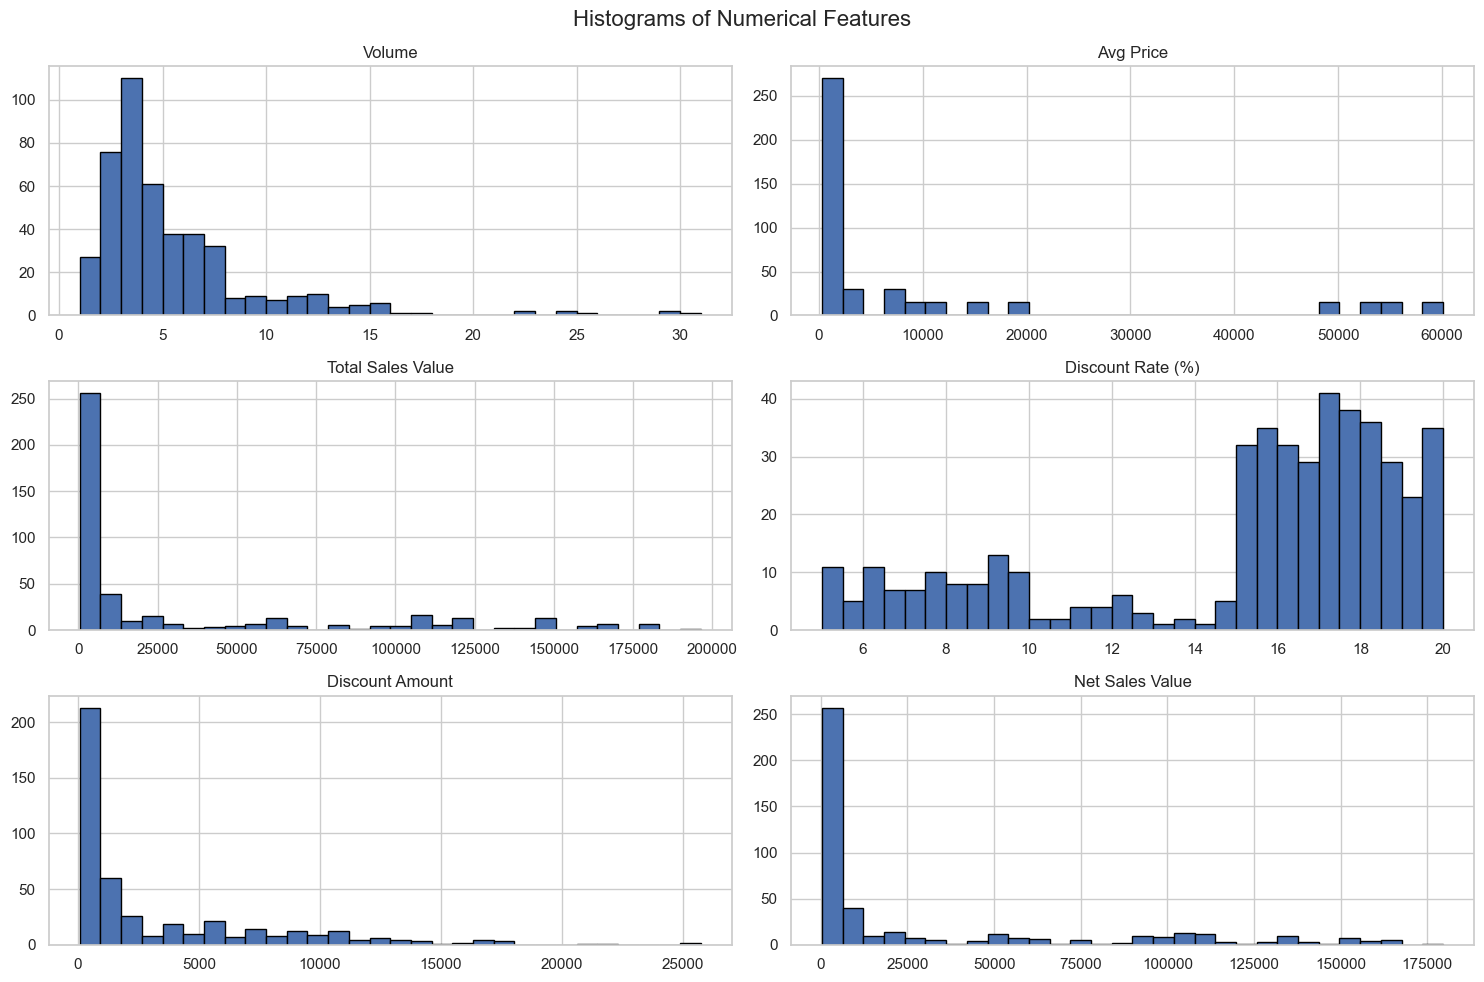

In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


In [19]:
df[numerical_cols].skew().sort_values(ascending=False)


Volume               2.731724
Discount Amount      1.913038
Avg Price            1.908873
Net Sales Value      1.540822
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
dtype: float64

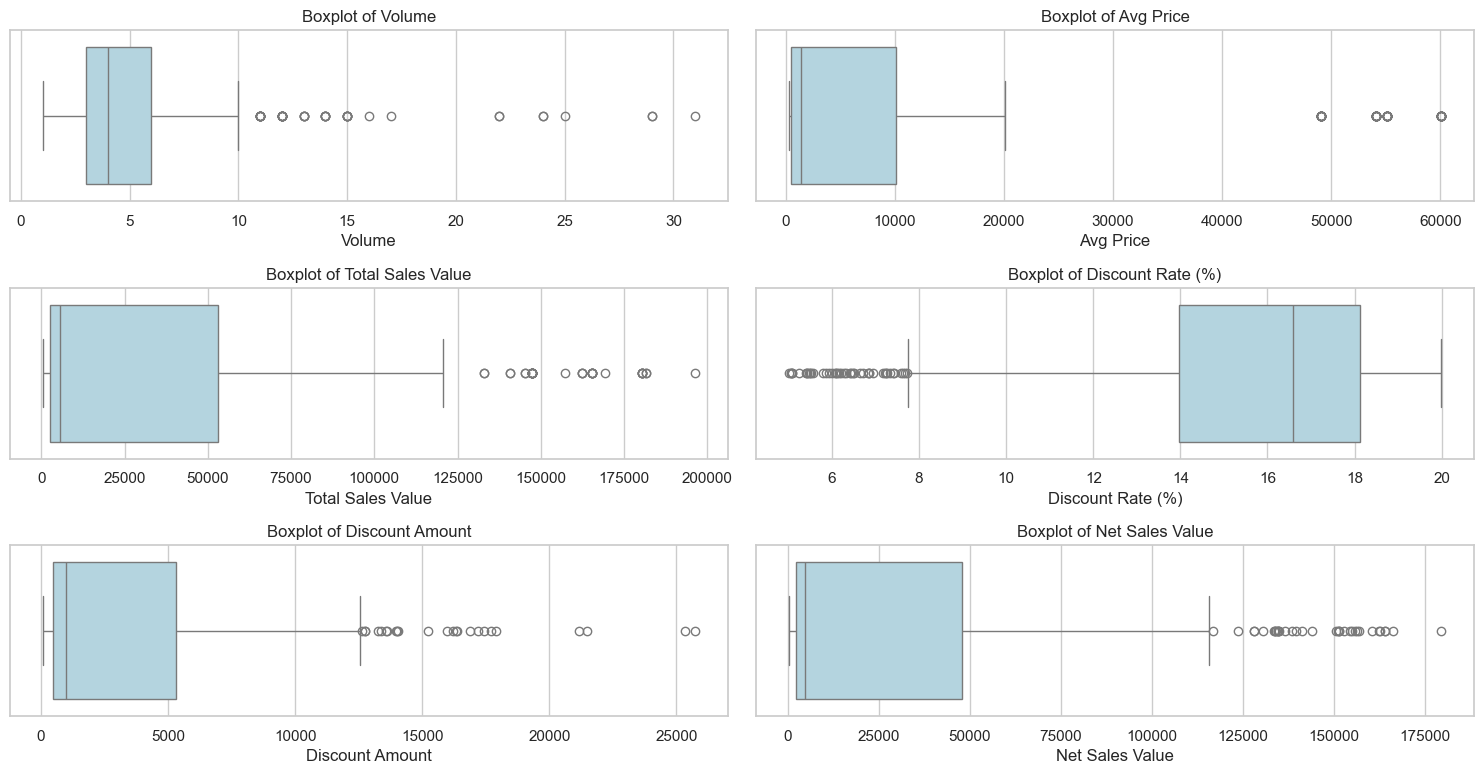

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [21]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_4996\4244519209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_4996\4244519209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_4996\4244519209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[c

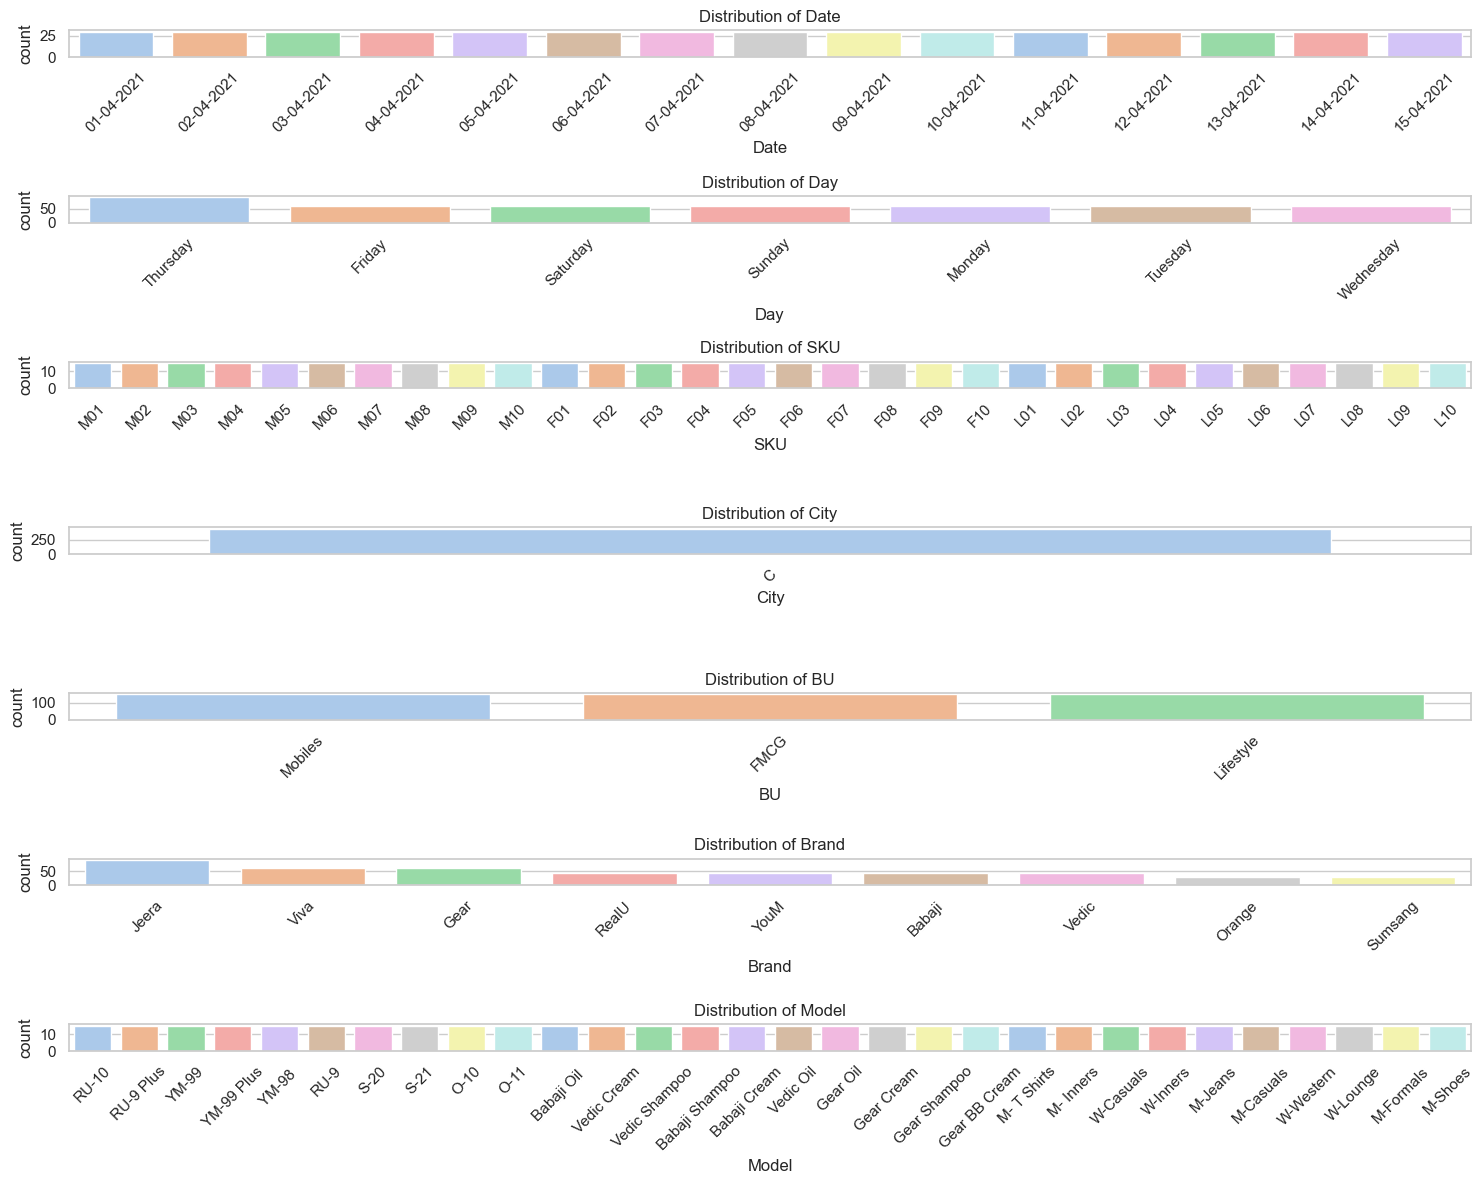

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


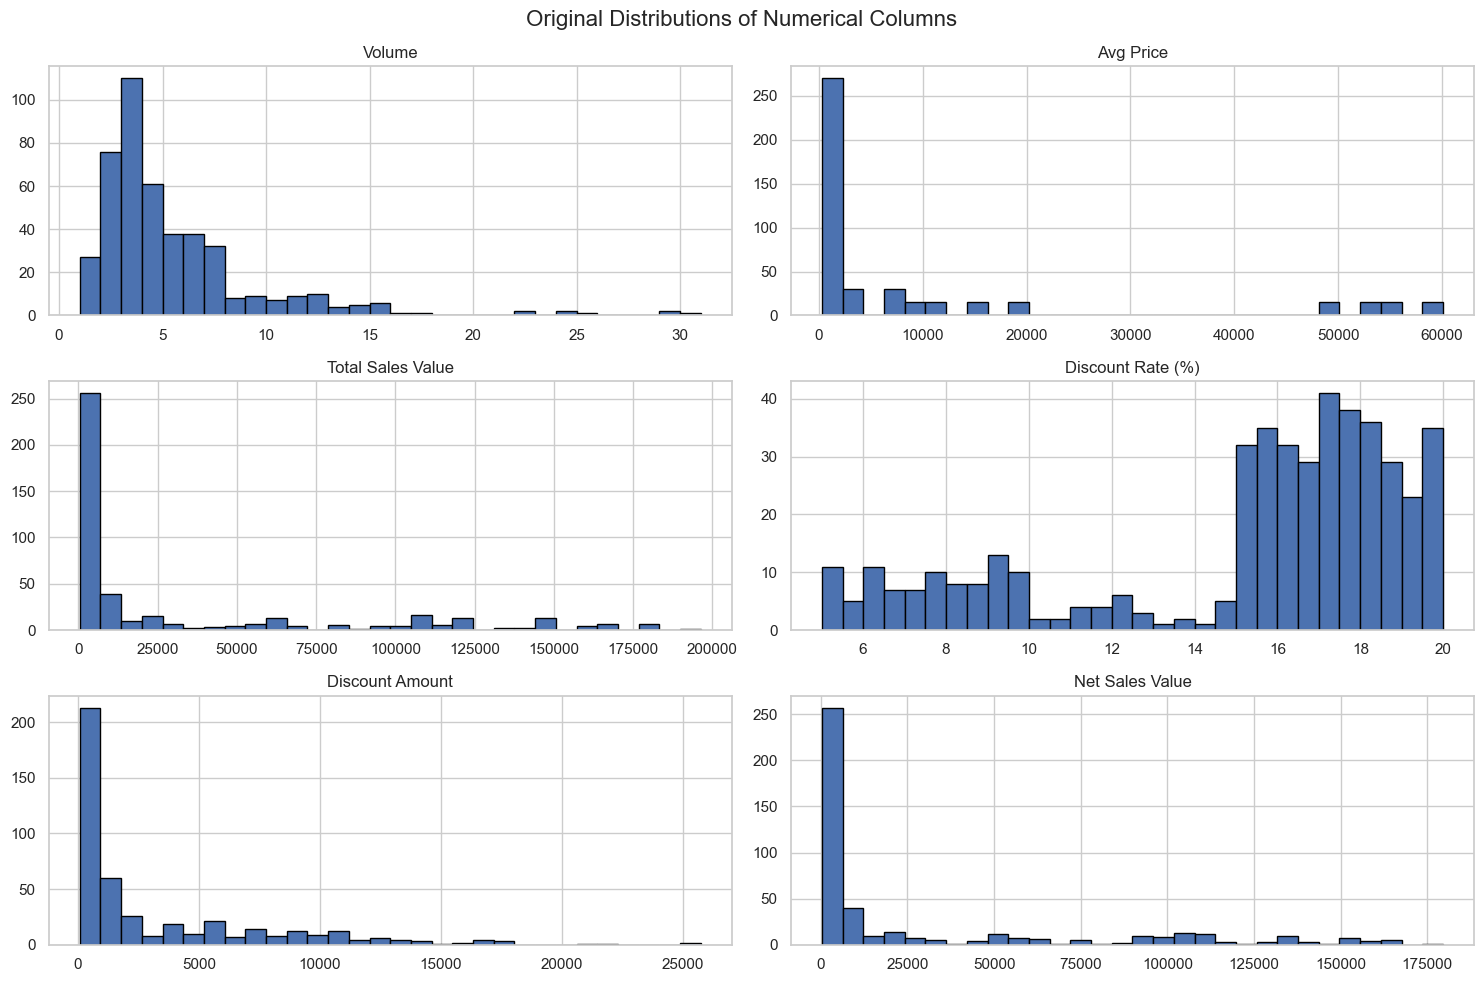

In [23]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Original Distributions of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()


In [26]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\LENOVO THINKPAD 13\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


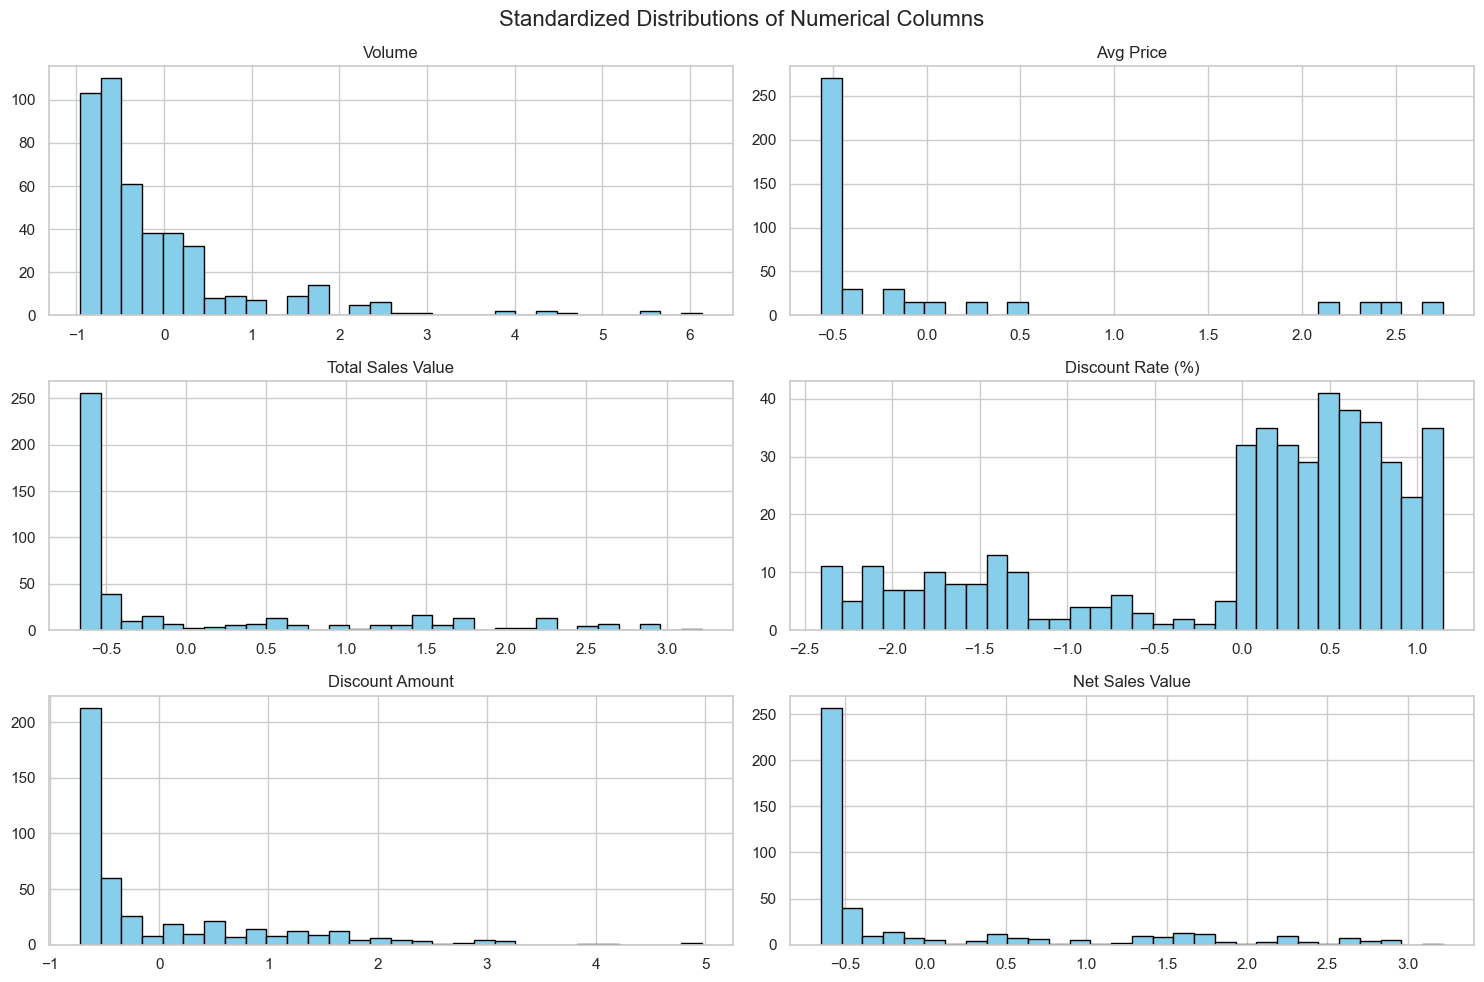

In [31]:
df_standardized[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black', color='skyblue')
plt.suptitle('Standardized Distributions of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()


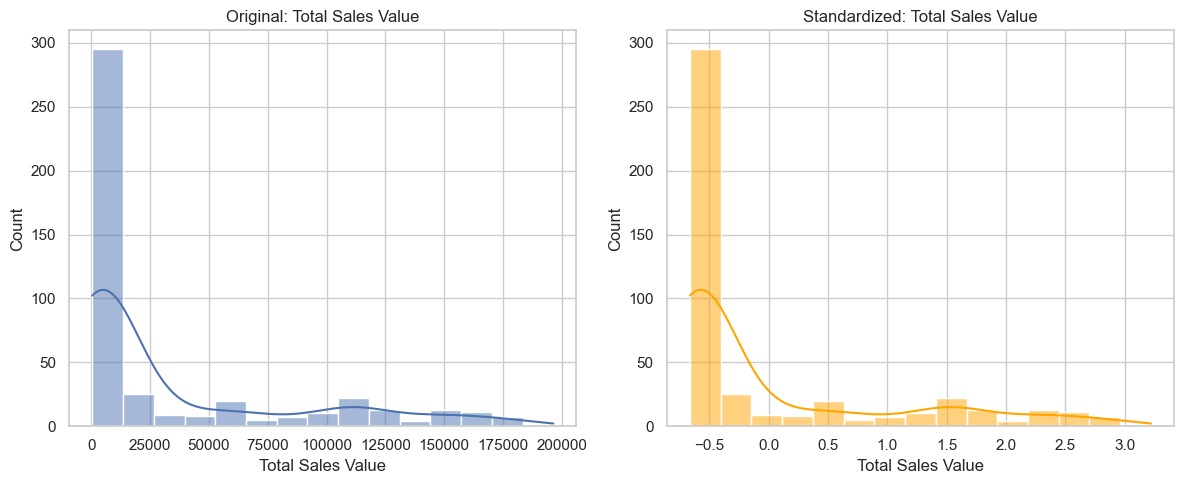

In [33]:
import seaborn as sns

col = 'Total Sales Value'  # Example column
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True)
plt.title(f'Original: {col}')

plt.subplot(1, 2, 2)
sns.histplot(df_standardized[col], kde=True, color='orange')
plt.title(f'Standardized: {col}')

plt.tight_layout()
plt.show()
